In [1]:
from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.io import load_json_model
from pymodulon.util import infer_activities
import pandas as pd

from os import path
import re
from tqdm.notebook import tqdm
from pymodulon.util import _parse_sample

In [2]:
import matplotlib.patches as mpatches
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
ica_data = load_json_model('../../putidaPRECISE321.json')

In [4]:
new_data=pd.read_csv('../../data/raw_data/non_precise321/deseq2-tpm_log2_DrelA_A34.csv',index_col=0)

In [5]:
# Center your data to a reference condition (or replicates of the condition, in this case)
#centered_new_data = new_data.sub(new_data[['Glucose']].mean(axis=1),axis=0)
centered_new_data = new_data.sub(new_data[['WT_R1','WT_R2','WT_R3','WT_R4']].mean(axis=1),axis=0)

centered_new_data.head()

,WT_R1,WT_R2,WT_R3,WT_R4,A3_R1,A3_R2,A4_R1,A4_R2,DRelA_R1,DRelA_R2
PP_0001,-0.147261,0.024767,0.119225,0.003268,-0.469466,-0.368596,-0.279332,-0.312898,0.043978,-0.059157
PP_0002,0.314577,0.446779,-0.323927,-0.437430,-1.255946,-1.105990,-0.551049,-0.735641,0.021074,0.071041
PP_0003,0.094635,0.358647,-0.207480,-0.245802,-1.209562,-1.129244,-0.798324,-0.966920,0.103967,-0.295239
PP_0004,0.167252,0.355786,-0.223799,-0.299239,-0.660174,-0.745817,-0.227952,-0.267475,0.262298,0.084242
PP_0005,-0.163605,-0.295831,0.046514,0.412922,-0.864595,-0.901583,-1.219478,-1.025201,-1.113630,-1.042086


In [6]:
activities = infer_activities(ica_data,centered_new_data)
activities.head()

d:\dropbox (personal)\jupyter_py_notebook\pymodulon-github\pymodulon\src\pymodulon\util.py:327: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


,WT_R1,WT_R2,WT_R3,WT_R4,A3_R1,A3_R2,A4_R1,A4_R2,DRelA_R1,DRelA_R2
Null-1,-4.343431,-4.999494,4.008784,5.334142,-19.729342,-17.153258,-24.351846,-25.861700,-10.366853,-10.720069
GbdR,1.573106,1.655248,-1.670327,-1.558028,9.759314,8.222114,0.544734,0.654758,-4.081607,-4.003470
PP_2034-7,0.545271,-2.158765,3.812816,-2.199322,-10.429149,-10.308020,-9.297114,-8.519596,-7.748165,-5.436135
Multiple stress-1,1.647950,-2.323284,0.944046,-0.268712,-2.862220,-2.989874,4.639248,4.641123,8.870839,6.476017
PedR1-1,0.147638,-0.415587,-0.013462,0.281411,-0.873430,0.083950,1.130503,0.924176,1.109672,0.234264


In [7]:
centered_new_data.columns

Index(['WT_R1', 'WT_R2', 'WT_R3', 'WT_R4', 'A3_R1', 'A3_R2', 'A4_R1', 'A4_R2',
       'DRelA_R1', 'DRelA_R2'],
      dtype='object')

In [8]:
new_sample_table = pd.DataFrame([['new_data','control']]*4+
                                [['new_data','A3']]*2+
                                [['new_data','A4']]*2+
                                [['new_data','DRelA']]*2,
                                columns=['project','condition'],
                                index=centered_new_data.columns)

new_data = IcaData(M = ica_data.M,
                   A = activities,
                  gene_table = ica_data.gene_table,
                   sample_table = new_sample_table,
                   imodulon_table = ica_data.imodulon_table)

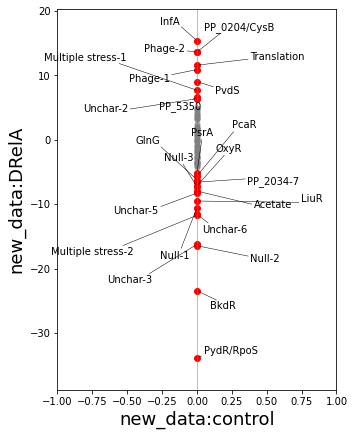

In [9]:
fig, table=plot_dima(new_data,"new_data:control","new_data:DRelA",threshold=5, fdr=1,
              legend_kwargs={'fontsize':14},
                      ax_font_kwargs={'fontsize':18}, colors={'red'},
             table=True)

fig.figure.set_size_inches(5,7)

In [10]:
table[table.difference>5].index.size

9

In [11]:
table[table.difference<5].index.size

16

In [12]:
fig.get_figure().savefig("./raw_files_new/Fig5c_RelA.svg")

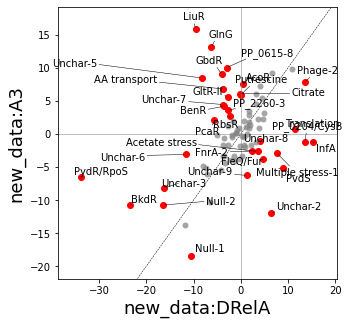

In [13]:
fig=plot_dima(new_data,"new_data:DRelA","new_data:A3",threshold=5, fdr=1,
              legend_kwargs={'fontsize':14},
                      ax_font_kwargs={'fontsize':18}, colors={'red'})

fig.figure.set_size_inches(5,5)

In [14]:
fig.get_figure().savefig("./raw_files_new/Fig5d_A3_RelA.svg")

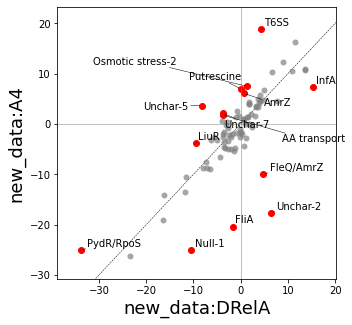

In [15]:
fig=plot_dima(new_data,"new_data:DRelA","new_data:A4",threshold=5, fdr=1,
              legend_kwargs={'fontsize':14},
                      ax_font_kwargs={'fontsize':18}, colors={'red'})

fig.figure.set_size_inches(5,5)

In [16]:
fig.get_figure().savefig("./raw_files_new/Fig5d_A4_RelA.svg")